# Data Mining Project
Siannas Spyridon - 1053718 (HMTY)

## Task 1

### A. Analyze the dataset

We are going to import pandas and matplotlib which are going to help us with
the data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We should define some helper functions to help us with our data manipulation later on

In [2]:
def annotate_axes(plot):
    x_offset = -0.14
    for p in plot.patches:
        b = p.get_bbox()
        val = "{:.0f}".format(b.y1 + b.y0)        
        plot.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + 20))

def plot_frequency(column):
    plot = data[column].value_counts().plot.bar()
    annotate_axes(plot)
    plt.show()

First, we should load the data from the csv file and view the characteristics names

In [3]:
data = pd.read_csv("dataset/healthcare-dataset-stroke-data/healthcare-dataset-stroke-data.csv")
', '.join(data.columns.values)

'id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke'

Then, we should take a first look at the values

In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Before we start printing plots, we should examine the correlation matrix of our columns

In [5]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


We can immediately tell that most of the corelations revolve around the age attribute. Having this info, we can go on to plot more of our data.

In [6]:
### Average specimen age:
data.age.mean()

43.226614481409

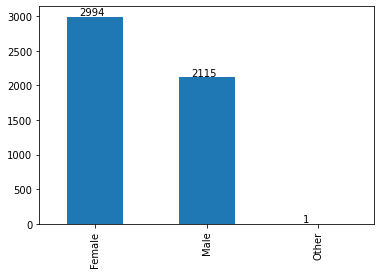

In [7]:
### Specimen genders:
plot_frequency("gender")

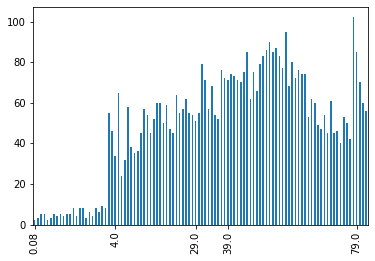

In [8]:
### Specimen age groups:
plot = data.age.value_counts().sort_index().plot.bar()
x=np.array([0,25,50,60,100])
plot.set(xticks=x)
plt.show()

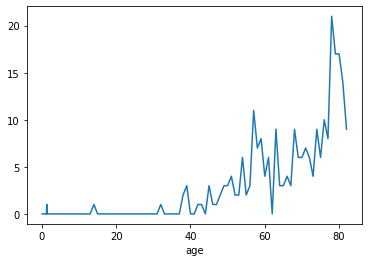

In [9]:
### Strokes per age
plot = data.groupby("age").stroke.sum().plot()

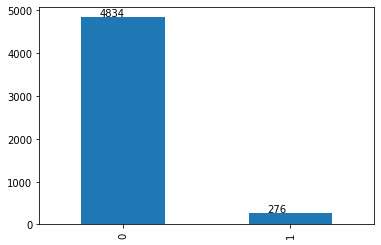

In [10]:
### Heart disease frequency
plot_frequency("heart_disease")

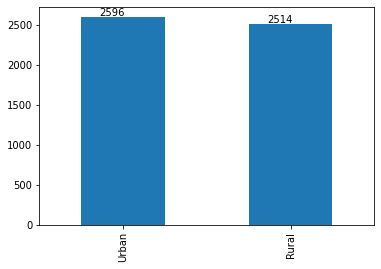

In [11]:
### Residence frequency
plot_frequency("Residence_type")

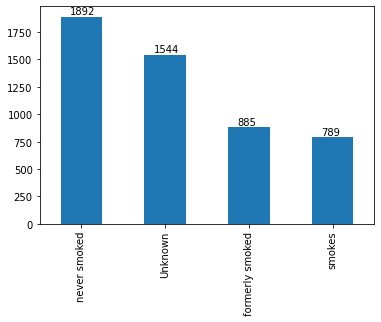

In [12]:
### Smoking status frequency
plot_frequency("smoking_status")

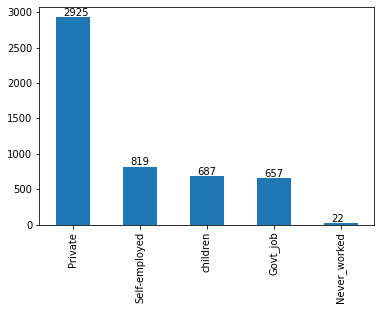

In [13]:
### Work type frequency
plot_frequency('work_type')

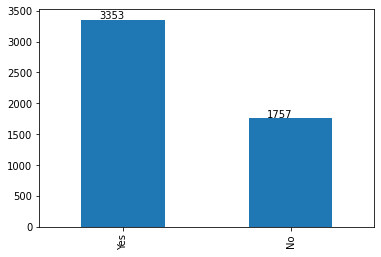

In [14]:
### Marital status frequency (Was the specimen married at some point in his life)
plot_frequency("ever_married")

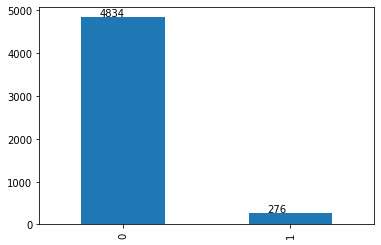

In [15]:
### Heart disease frequency
plot_frequency("heart_disease")

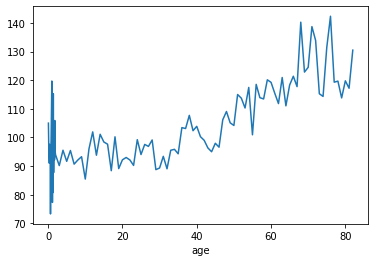

In [16]:
### Average glucose level per age
plot = data.groupby("age").avg_glucose_level.mean().plot()

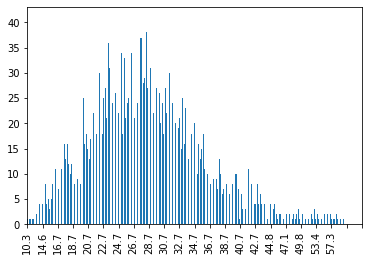

In [17]:
### BMI Frequency
plot = data.bmi.value_counts().sort_index().plot.bar()
x=np.arange(0,450,20)
plot.set(xticks=x)
plt.show()

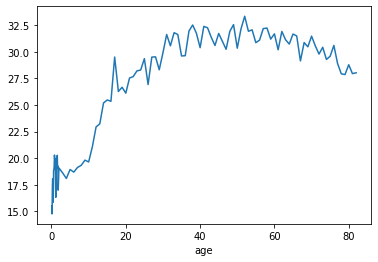

In [18]:
### BMI per age
plot = data.groupby("age").bmi.mean().plot()

### B. Data pre-processing

There are two columns with missing data. The `smoking_status` contains some `Unknown` values which don't give us any knowledge and the `bmi` column which contains some `NaN` values. There are a few ways to handle the missing data. 

- Remove the columns with the missing data
- Fill in the missing data using the mean values of the column
- FIll in the missing data using a linear regression function based on the column data
- FIll in the missing data using a k-Nearest Neighbours (kNN) algorithm 

### B1 - Column Removal

In [19]:
dataset1 = data.drop(columns=["bmi","smoking_status"])
dataset1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,0


### B2 - Fill based on column mean

In [20]:
dataset2 = data.drop(columns=['smoking_status'])
dataset2.bmi = data.bmi.fillna(data.bmi.mean())
dataset2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,0


### B3 - Fill with linear regression

In [21]:
from sklearn.linear_model import LinearRegression 
dataset3 = data.drop(columns=['smoking_status'])
df_nona = data.dropna(subset=['bmi'])
xtrain = df_nona.age.values
xtrain = xtrain.reshape(xtrain.shape[0],1)

ytrain = df_nona.bmi.values
ytrain = ytrain.reshape(ytrain.shape[0],1)

y_full = dataset3.age.values
y_full = y_full.reshape(y_full.shape[0], 1)

lreg = LinearRegression()
lreg.fit(xtrain, ytrain)

LinearRegression()

In [22]:
dataset3['predicted_bmi']=lreg.predict(y_full)
dataset3.bmi = dataset3.bmi.fillna(dataset3['predicted_bmi'])
dataset3 = dataset3.drop(['predicted_bmi'],axis=1)
dataset3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.998572,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,33.204372,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,0


### B4 - Fill with KNN
First, we have to encode the categorical data and then use our KNN imputer. We will perform this twice, once with the bmi column calculated in the previous exercise and once without it

In [23]:
map_work_type = {
    'Private': 1,
    'Self-employed': 2,
    'children': 3,
    'Govt_job' : 4,
    'Never_Worked': 5
}

map_gender = {
    'Male': 1,
    'Female': 2
}

map_married = {
    'Yes': 1,
    'No': 2
}

map_residence = {
    'Urban': 1,
    'Rural': 2
}

map_smoking = {
    'formerly smoked': 1,
    'smokes': 2,
    'never smoked': 3,
    'Unknown': -1
}

In [24]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['gender','ever_married','Residence_type','smoking_status','work_type'], return_df=True,
mapping= [
    {'col':'gender', 'mapping':map_gender},
    {'col':'ever_married', 'mapping':map_married},
    {'col':'Residence_type', 'mapping':map_residence},
    {'col':'smoking_status', 'mapping':map_smoking},
    {'col':'work_type','mapping':map_work_type}
])

dataset_enc = encoder.fit_transform(data)
dataset_enc.smoking_status = dataset_enc.smoking_status.replace(-1, np.nan)
dataset_enc

c:\Users\SpyrosSiannas\Documents\git-repos\DataMIningProject-2021\env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1,1.0,1,228.69,36.6,1.0,1
1,51676,2.0,61.0,0,0,1,2.0,2,202.21,NaN,3.0,1
2,31112,1.0,80.0,0,1,1,1.0,2,105.92,32.5,3.0,1
3,60182,2.0,49.0,0,0,1,1.0,1,171.23,34.4,2.0,1
4,1665,2.0,79.0,1,0,1,2.0,2,174.12,24.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,2.0,80.0,1,0,1,1.0,1,83.75,NaN,3.0,0
5106,44873,2.0,81.0,0,0,1,2.0,1,125.20,40.0,3.0,0
5107,19723,2.0,35.0,0,0,1,2.0,2,82.99,30.6,3.0,0
5108,37544,1.0,51.0,0,0,1,1.0,2,166.29,25.6,1.0,0


In [25]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
dataset4 = pd.DataFrame(imputer.fit_transform(dataset_enc), columns=dataset_enc.columns)
dataset4

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,1.0,67.0,0.0,1.0,1.0,1.0,1.0,228.69,36.60,1.0,1.0
1,51676.0,2.0,61.0,0.0,0.0,1.0,2.0,2.0,202.21,28.08,3.0,1.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,1.0,2.0,105.92,32.50,3.0,1.0
3,60182.0,2.0,49.0,0.0,0.0,1.0,1.0,1.0,171.23,34.40,2.0,1.0
4,1665.0,2.0,79.0,1.0,0.0,1.0,2.0,2.0,174.12,24.00,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,2.0,80.0,1.0,0.0,1.0,1.0,1.0,83.75,32.40,3.0,0.0
5106,44873.0,2.0,81.0,0.0,0.0,1.0,2.0,1.0,125.20,40.00,3.0,0.0
5107,19723.0,2.0,35.0,0.0,0.0,1.0,2.0,2.0,82.99,30.60,3.0,0.0
5108,37544.0,1.0,51.0,0.0,0.0,1.0,1.0,2.0,166.29,25.60,1.0,0.0


### BMI dropped 

In [26]:
dataset_enc = dataset_enc.drop(columns=['bmi'])
dataset5 = pd.DataFrame(imputer.fit_transform(dataset_enc), columns=dataset_enc.columns)
dataset5

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046.0,1.0,67.0,0.0,1.0,1.0,1.0,1.0,228.69,1.0,1.0
1,51676.0,2.0,61.0,0.0,0.0,1.0,2.0,2.0,202.21,3.0,1.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,1.0,2.0,105.92,3.0,1.0
3,60182.0,2.0,49.0,0.0,0.0,1.0,1.0,1.0,171.23,2.0,1.0
4,1665.0,2.0,79.0,1.0,0.0,1.0,2.0,2.0,174.12,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,2.0,80.0,1.0,0.0,1.0,1.0,1.0,83.75,3.0,0.0
5106,44873.0,2.0,81.0,0.0,0.0,1.0,2.0,1.0,125.20,3.0,0.0
5107,19723.0,2.0,35.0,0.0,0.0,1.0,2.0,2.0,82.99,3.0,0.0
5108,37544.0,1.0,51.0,0.0,0.0,1.0,1.0,2.0,166.29,1.0,0.0


## C. Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

n_rows=dataset5.shape[0]
split_point = round(n_rows*0.75)
dataset_train = dataset5.iloc[:split_point,:]
dataset_test = dataset5.iloc[split_point:,:]

X_train = dataset_train.drop(columns=['stroke'])
Y_train = dataset_train.stroke

X_test = dataset_test.drop(columns=['stroke'])
Y_test = dataset_test.stroke

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, random_state=0)

In [28]:
Y_pred = clf.predict(X_test)

print(precision_score(Y_pred,Y_test),recall_score(Y_pred,Y_test),f1_score(Y_pred,Y_test))

0.0 0.0 0.0
c:\Users\SpyrosSiannas\Documents\git-repos\DataMIningProject-2021\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SpyrosSiannas\Documents\git-repos\DataMIningProject-2021\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SpyrosSiannas\Documents\git-repos\DataMIningProject-2021\env\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [1]:
from src.nn import NeuralNetwork

nn = NeuralNetwork()

c:\Users\SpyrosSiannas\Documents\git-repos\DataMIningProject-2021\env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SpyrosSiannas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SpyrosSiannas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Starting word model training
Finished training!
 Model saved to models/word_model.bin


In [3]:
nn.word_model.wv.get_vector('king')

array([-0.021413  , -0.13853183, -0.1785605 , -0.65985745,  0.47796986,
        0.20027737, -0.12595892,  0.14661993,  0.06434168,  0.01866299,
       -0.5238816 , -0.3042802 ,  0.13209252, -0.4267624 ,  0.01273232,
        0.10706017,  0.05318086, -0.13228291,  0.21435452,  0.17793284,
        0.10715008, -0.32426178, -0.08992343,  0.01448372, -0.3003541 ,
        0.10593013,  0.14246254, -0.36908627,  0.29776126,  0.23886707,
        0.64079994,  0.20548128, -0.07977541, -0.08372706,  0.38090727,
        0.3571152 , -0.37830126,  0.10371915, -0.22873431, -0.2103131 ,
        0.16457023, -0.36567685,  0.47759214,  0.3634139 ,  0.11070767,
        0.34264466,  0.19391935, -0.50651485, -0.1491552 , -0.12115735,
        0.27931684, -0.24636073, -0.08184552, -0.0440405 , -0.637209  ,
       -0.15649864, -0.46479127,  0.18015298, -0.1954929 ,  0.12643448,
        0.07039765,  0.14711882, -0.13960713,  0.24808289, -0.34159446,
       -0.09806086, -0.04495403,  0.21734494, -0.00906639,  0.36